# 3장

# MNIST

In [1]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# 이미지 다운 이미지 다운
# 784 = 해상도(28 X 28 픽셀)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

# DSCR = 데이터셋을 설명하는 DSCR 키
# data = 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
# target = 레이블 배열을 담은 target 키'''

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# X에 data 값. Y에 target 값 X에 data 값. Y에 target 값
X, y = mnist["data"], mnist["target"]

X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

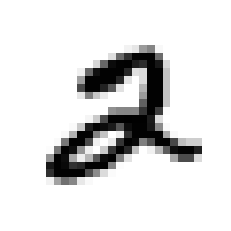

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 샘플 1개 가져오기
some_digit = X[5]

# 28 X 28 배열로 크기를 바꾸고 맷플롯립의 imshow()함수를 사용해 그린다.
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
some_digit.shape

(784,)

In [7]:
some_digit_image.shape

(28, 28)

In [8]:
y[0]
# 결과값은 문자열

'5'

In [9]:
import numpy as np

In [10]:
# 레이블은 문자열
# 타입 변경 -> 정수로 변경
y = y.astype(np.uint8)

In [11]:
# 데이터를 자세히 조사하기 위해 항상 전에 테스트 세트를 만들고 따로 떼어 놓아야 한다!!
# 훈련 세트(앞쪽 60,000개 이미지). 테스트 세트(뒷쪽 10.000개 이미지)
# X_train, X_test. y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

훈련 세트는 이미 섞여 있어서 모든 교차 검증 폴드를 비슷하게 만든다.

어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠진다.
-> 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

# 이진 분류기 훈련

In [12]:
# 5로 인식하지 않으면 false
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5 = (y_train == 2)
y_test_5 = (y_test == 2)

In [13]:
# SGDClassifier = 훈련하는 데 무작위성을 사용한다.
# -> 결과를 재현하고 싶다면 random_state 매개변수를 지정한다.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# ***
sgd_clf.predict([some_digit])

array([ True])

# 성능 측정

In [15]:

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96645, 0.95895, 0.904  ])

In [16]:

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self # 자기자신으로 나옴from sklearn.base import BaseEstimator
        
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
# 모델의 정확도 추측
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90355, 0.8993 , 0.89925])

In [18]:
# 오차 행렬
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
# 오차 행렬을 만들 준비
from sklearn.metrics import confusion_matrix
# y_train_5 = 타깃 클래스
# y_train_pred = 예측 클래스
confusion_matrix(y_train_5, y_train_pred)

array([[51538,  2504],
       [  908,  5050]])

<결과>

**[a(진짜 음성)  b(거짓 양성)]**
---
**[c(거짓 음성) d(진짜 양성)]**
---

In [20]:
# 완벽한 분류기일 경우
# 진짜 양성과 진짜 음성만 가지고 있을 것이므로 오차 행렬의 주대각선만 0이 아닌 값이 나온다.
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54042,     0],
       [    0,  5958]])

In [21]:
# 정밀도 = precision_score
# 재현율 = recall_score 
from sklearn.metrics import precision_score, recall_score

# 정밀도 계산
precision_score(y_train_5, y_train_pred)

0.6685199894095843

In [22]:
# 재현율 계산
recall_score(y_train_5, y_train_pred)

0.8475998657267539

In [23]:
# 정밀도와 재현율을 f1함수로 만든다
# f1의 점수는 정밀도와 재현율의 조화평균
# f1 = 2/(1/정밀도)+(1/재현율)
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7474837181764358

**정밀도/재현율 트레이드오프**

정밀도와 재현율이 높을수록 좋은 점수가 되겠지만 현실에서는 모두 얻을 수는 없다.\
정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지이다.\
이를 정밀도/재현율 트레이드오프라고 한다.

In [24]:
# 분류기의 predict() 메서드 대신 decidion_function() 메세드 호출
# -> 각 샘플의 점수를 얻을 수 있다.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4616.86417714])

In [25]:
# threshold = 임계값
threshold = 0
y_some_digit_pred = (y_scores > threshold)
# 임계값이 0보다 큰 경우 양성으로 예측

In [26]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# 임계값을 높이면 재현율이 줄어든다는 사실을 보여준다.

array([False])

In [27]:
# cross_val_predict() 함수를 이용해 훈련세트에 있는 모든 샘플의 점수를 구한다.
# 예측 결과가 아닌 결정 점수를 반환 받아야한다.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [28]:
# 가능한 모든 임계값에 대해 정밀도와 재현율을 계산
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

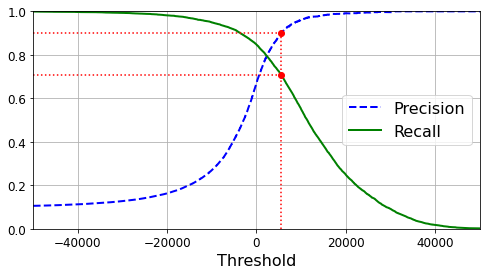

In [29]:
# 결정 임계값에 대한 정밀도와 재현율
# b-- 파란색, g-- 초록색을 표시 결정 임계값에 대한 정밀도와 재현율
# b-- 파란색, g-- 초록색을 표시
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

   # 임계값을 표시하고 범례, 축 이름, 그리드를 추가

    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")  
plt.show()    

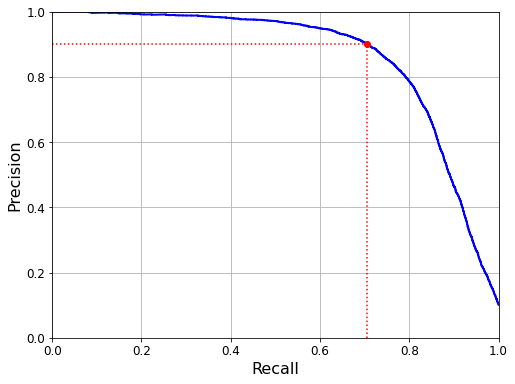

In [30]:
# 재현율에 대한 정밀도 곡선을 그리기

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

In [31]:
# 정밀도 90% 달성하는 것이 목표
# 더 정확하게 최소한 90% 정밀도가 되는 가장 낮은 임계값을 찾을 수 있다.
# np.argmax()는 최댓값의 첫 번째 인덱스 반환
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [32]:
# 훈련세트에 대한 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행 훈련세트에 대한 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드를 실행
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
# 예측에 대한 정밀도
precision_score(y_train_5, y_train_pred_90)

0.9000641985876311

In [34]:
# 예측에 대한 재현율
recall_score(y_train_5, y_train_pred_90)

0.7059415911379657

In [35]:
# roc_curve 함수를 사용해 여러 임계값에서 TPR과 FPR을 계산
# ROC 곡선은 정밀도에 대한 재현율 곡선X
# 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

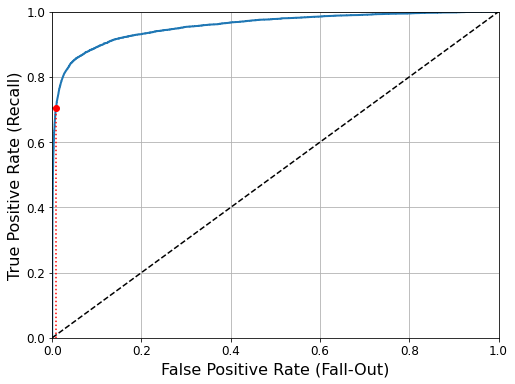

In [36]:
# 맷플롯립을 사용해 곡선 그리기
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선

    # 축 이름. 그리드 추가
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown

plt.show()

In [37]:
# AUC = 곡선 아래의 면적
# 완벽한 분류기는 ROC의 AUC = 1
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9568395257681235

In [38]:
# RandomForestClassifier을 훈련
# predict_proba() 메서드는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [39]:
# 양성 클래스에 대한 확률을 점수로 사용
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

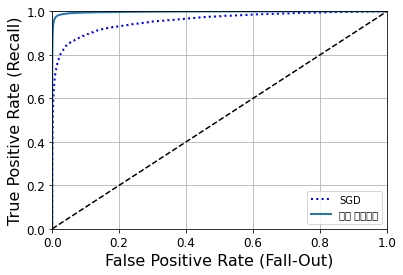

In [40]:
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

# 다중 분류

이진 분류가 두 개의 클래스를 구별하는 반면 다중 분류기는 둘 이상의 클래스를 구별할 수 있다.

In [41]:
# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 알고리즘에 따라 자동으로 OvR 또는 OvO를 실행
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train_5가 아니고 t_train을 사용
# y_train_5 = 5를 구별한 타깃 클래스
# y_train = 0에서 9까지의 원래 타깃 클래스를 사용해 SVC를 훈련
svm_clf.predict([some_digit])

array([2], dtype=uint8)

In [42]:
# decision_function() 메서드를 호출하면 샘플당 10개의 점수를 반환 decision_function() 메서드를 호출하면 샘플당 10개의 점수를 반환
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.7442516 , -0.30125634,  9.31399134,  7.26965016,  3.75753908,
         3.74771902,  0.71155138,  2.76650678,  8.2765048 ,  6.21840456]])

In [43]:
np.argmax(some_digit_scores)

2

In [44]:
# 분류기가 훈련될 때 classes_ 속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장
# 지금은 각 클래스의 인덱스가 클래스 값 자체와 같지만 이런 경우는 드물다.
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 사이킷런에서 OvO나 OvR을 사용하도록 강제하려면 OneVsRestClassifier나 OneVsOneClassifier를 사용
# 다음 코드는 SVC 기반으로 OvR전략을 사용하는 다중 분류기
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
# SGDClassifier를 훈련
# SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvR이나 OvO를 적용할 필요 없다.
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
# cross_val_score() 함수를 사용해 SGDClassifier의 정확도 평가 cross_val_score() 함수를 사용해 SGDClassifier의 정확도 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# 에러 분석

In [ ]:
# 오차 행렬
# cross_val_predict() 함수를 사용해 예측을 만들고 이전처럼 confusion_matrix() 함수를 호출
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
# matshow() 함수를 사용해 이미지로 표현
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# 3과 5분류
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()